In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

**Loading The Data**

In [1]:
train_dir = r'D:\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module (2)\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\train'
validation_dir = r'D:\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module (2)\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\validation'
test_dir = r'D:\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module (2)\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\test'

**Data Preprocessing**

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(

    train_dir,
    target_size = (150,150),
    batch_size = 20 ,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20 ,
    class_mode = 'binary'

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = "relu",
                        input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation='sigmoid'))

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Use learning_rate instead of lr
              metrics=['acc'])


In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 458ms/step - acc: 0.8789 - loss: 0.3095 - val_acc: 0.7150 - val_loss: 0.6050
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 462ms/step - acc: 0.9115 - loss: 0.2587 - val_acc: 0.6760 - val_loss: 0.7847
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 446ms/step - acc: 0.9018 - loss: 0.2369 - val_acc: 0.7080 - val_loss: 0.6440
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - acc: 0.9346 - loss: 0.1897 - val_acc: 0.6970 - val_loss: 0.6772
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - acc: 0.9533 - loss: 0.1603 - val_acc: 0.6830 - val_loss: 0.8269
Epoch 10/20
100/100 ━━━━━━━━━━━

In [16]:
print(history.history)

{'acc': [0.503000020980835, 0.0, 0.5885000228881836, 0.0, 0.6520000100135803, 0.0, 0.7149999737739563, 0.0, 0.7404999732971191, 0.0, 0.7524999976158142, 0.0, 0.7889999747276306, 0.0, 0.7944999933242798, 0.0, 0.8115000128746033, 0.0, 0.8324999809265137, 0.0], 'loss': [0.6941054463386536, 0.0, 0.6655434966087341, 0.0, 0.6222273707389832, 0.0, 0.5709192752838135, 0.0, 0.5313203930854797, 0.0, 0.5041212439537048, 0.0, 0.4718150198459625, 0.0, 0.4413507282733917, 0.0, 0.4145026206970215, 0.0, 0.37539932131767273, 0.0], 'val_acc': [0.5400000214576721, 0.609000027179718, 0.6660000085830688, 0.6850000023841858, 0.6859999895095825, 0.703000009059906, 0.6759999990463257, 0.7059999704360962, 0.7179999947547913, 0.6430000066757202], 'val_loss': [0.676252007484436, 0.6480779051780701, 0.6139581203460693, 0.5910578370094299, 0.587446391582489, 0.5816722512245178, 0.6044524908065796, 0.585641622543335, 0.560257077217102, 0.7959268689155579]}


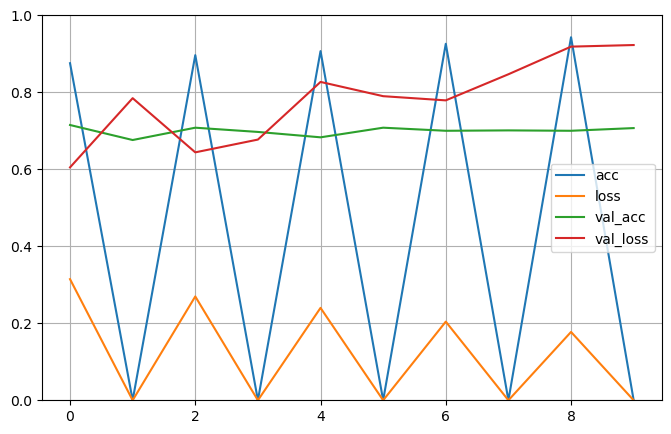

In [20]:
# Find the shortest length among all arrays in history.history
min_length = min(len(v) for v in history.history.values())

# Trim all arrays to the shortest length
trimmed_history = {k: v[:min_length] for k, v in history.history.items()}

# Plot the trimmed history
pd.DataFrame(trimmed_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Adjust as per your metric range
plt.show()
